In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

Initialize the `Intermediate Jesey Dataset` from `s3`:

In [2]:
from nucleus.dataset.datasets.base import VqDataset


ds = VqDataset(
    name='intermediate_basketball_jerseys',
    bucket='hudlrd-experiments',
    key='jersey-tagging/development',
    n_jobs=None,
    show_progress=True
)

How many images does this dataset have?

In [3]:
len(ds)

444

Visualize some images from this dataset:

CPU times: user 228 ms, sys: 23.6 ms, total: 251 ms
Wall time: 1.43 s


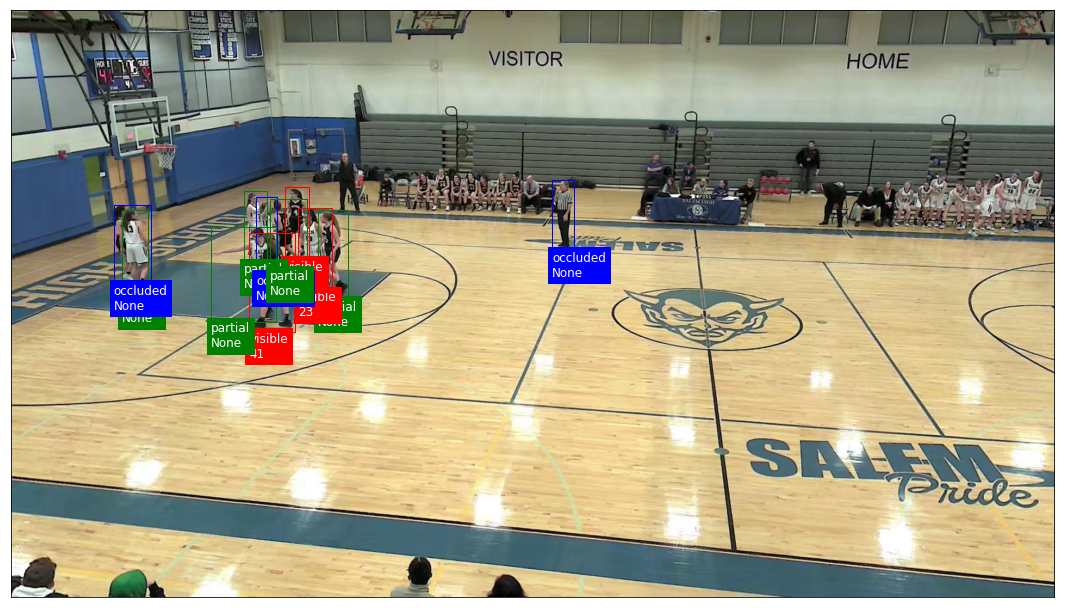

In [4]:
%time ds.view_row(0)

CPU times: user 202 ms, sys: 10.3 ms, total: 212 ms
Wall time: 1.13 s


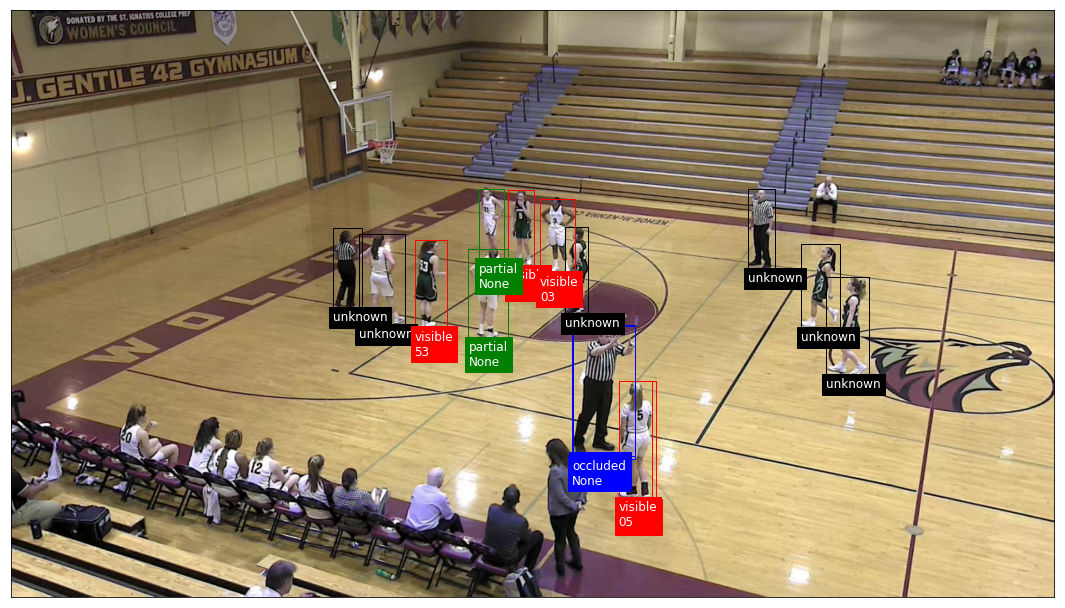

In [5]:
%time ds.view_row(1)

Images are being accessed from s3, this is quite slow:

In [6]:
%time row, image = ds[0]

CPU times: user 89.3 ms, sys: 7.33 ms, total: 96.6 ms
Wall time: 1.19 s


To gain faster access to the images let us save them locally:

In [7]:
ds.save()

In [8]:
%time row, image = ds[0]

CPU times: user 69.2 ms, sys: 4.22 ms, total: 73.4 ms
Wall time: 60.1 ms


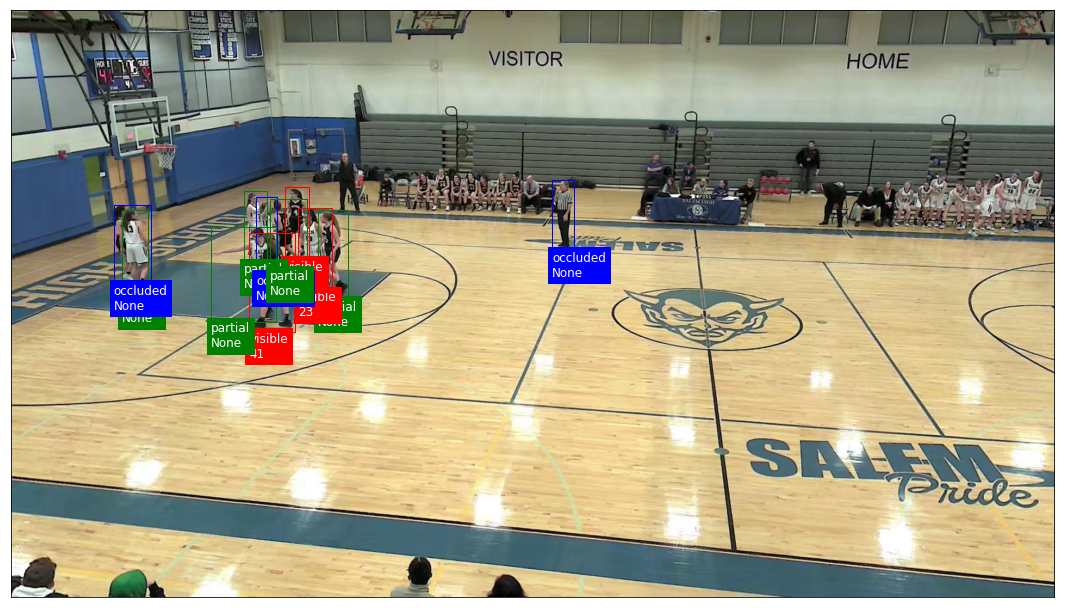

In [9]:
ds.view_row(0)

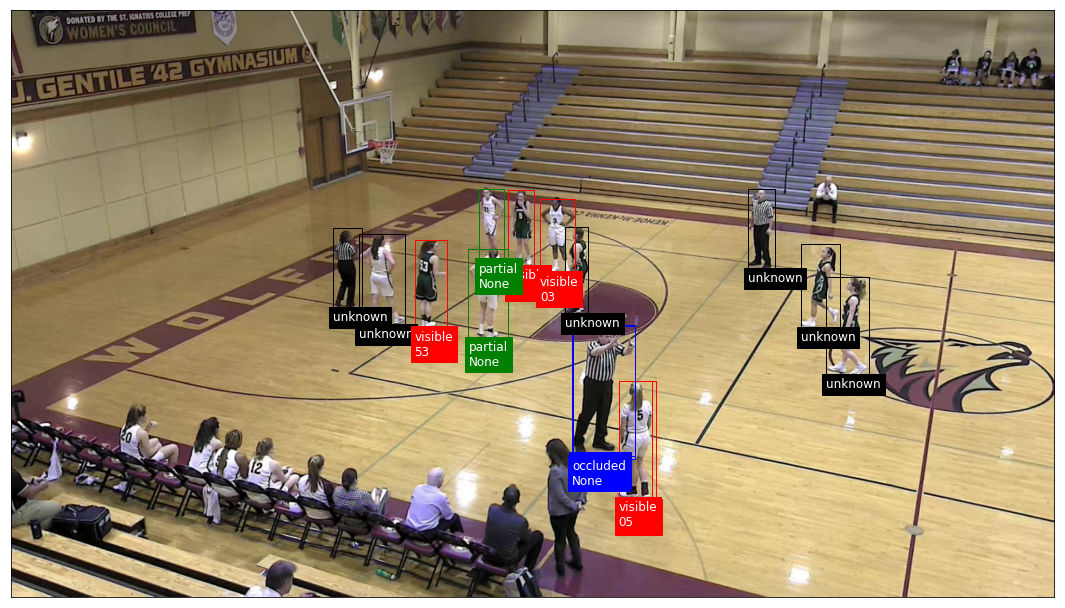

In [10]:
ds.view_row(1)

In [11]:
from nucleus.dataset.vq import VqDataset


ds = VqDataset.load(path='./dataset_cache/intermediate_basketball_jerseys/intermediate_basketball_jerseys.json.gz')

Create `Real Jersey Dataset`:

In [12]:
from typing import Optional, List

import pathlib
import pandas as pd

from hudl_aws.s3 import write_to_s3, ContentType

from nucleus.dataset import quilt_tools
from nucleus.dataset.keys import DatasetKeys
from nucleus.utils import progress_bar

In [13]:
from nucleus.dataset.datasets.base import BaseDataset


# TODO: Implement parallel version
def create_dataset_from_boxes(
    dataset,
    name: str,
    cache: str = './dataset_cache',
    skip_labels: Optional[List[str]] = None,
    compress: bool = True,
    image_format: str = 'png'
):
    r"""
    """
    cache = pathlib.Path(cache)
    full_cache = cache / name
    full_cache.mkdir(parents=True, exist_ok=True)

    records = []
    for row, image in progress_bar(ds):
        path = pathlib.Path(row[DatasetKeys.PATH.value])
        for i, crop in enumerate(image.images_from_box_collection(skip_labels=skip_labels)):
            path_crop = full_cache / f'{path.stem}_{i}.{image_format}'
            
            crop.save(
                path=path_crop, 
                compress=compress,
                image_format=image_format
            )
            
            parsed = crop.serialize(path=path_crop)
            records.append(parsed)
            
    df = pd.DataFrame.from_records(records)
    
    return BaseDataset(name=name, df=df, cache=cache)

In [14]:
new_ds = create_dataset_from_boxes(
    dataset=ds, 
    name='real_basketball_jersey', 
    cache='./dataset_cache',
    skip_labels=['partial'],
)

new_ds.df

labels                                               path
0        [visible, 23]  /Users/joan.alabort/cvdev/specialist/week1/nuc...
1        [visible, 04]  /Users/joan.alabort/cvdev/specialist/week1/nuc...
2     [occluded, None]  /Users/joan.alabort/cvdev/specialist/week1/nuc...
3        [visible, 41]  /Users/joan.alabort/cvdev/specialist/week1/nuc...
4     [occluded, None]  /Users/joan.alabort/cvdev/specialist/week1/nuc...
5     [occluded, None]  /Users/joan.alabort/cvdev/specialist/week1/nuc...
6        [visible, 05]  /Users/joan.alabort/cvdev/specialist/week1/nuc...
7        [visible, 05]  /Users/joan.alabort/cvdev/specialist/week1/nuc...
8        [visible, 53]  /Users/joan.alabort/cvdev/specialist/week1/nuc...
9        [visible, 03]  /Users/joan.alabort/cvdev/specialist/week1/nuc...
10    [occluded, None]  /Users/joan.alabort/cvdev/specialist/week1/nuc...
11       [visible, 05]  /Users/joan.alabort/cvdev/specialist/week1/nuc...
12    [occluded, None]  /Users/joan.alabort/cvdev/specialist/week1/nuc...
13       [visible, 15]  /Users/joan.alabort/cvdev/specialist/week1/nuc...
14       [visible, 30]  /Users/joan.alabort/cvdev/specialist/week1/nuc...
15       [visible, 14]  /Users/joan.alabort/cvdev/specialist/week1/nuc...
16       [visible, 03]  /Users/joan.alabort/cvdev/specialist/week1/nuc...
17       [visible, 22]  /Users/joan.alabort/cvdev/specialist/week1/nuc...
18    [occluded, None]  /Users/joan.alabort/cvdev/specialist/week1/nuc...
19    [occluded, None]  /Users/joan.alabort/cvdev/specialist/week1/nuc...
20    [occluded, None]  /Users/joan.alabort/cvdev/specialist/week1/nuc...
21       [visible, 15]  /Users/joan.alabort/cvdev/specialist/week1/nuc...
22       [visible, 05]  /Users/joan.alabort/cvdev/specialist/week1/nuc...
23    [occluded, None]  /Users/joan.alabort/cvdev/specialist/week1/nuc...
24    [occluded, None]  /Users/joan.alabort/cvdev/specialist/week1/nuc...
25    [occluded, None]  /Users/joan.alabort/cvdev/specialist/week1/nuc...
26    [occluded, None]  /Users/joan.alabort/cvdev/specialist/week1/nuc...
27    [occluded, None]  /Users/joan.alabort/cvdev/specialist/week1/nuc...
28    [occluded, None]  /Users/joan.alabort/cvdev/specialist/week1/nuc...
29       [visible, 02]  /Users/joan.alabort/cvdev/specialist/week1/nuc...
...                ...                                                ...
1912     [visible, 01]  /Users/joan.alabort/cvdev/specialist/week1/nuc...
1913  [occluded, None]  /Users/joan.alabort/cvdev/specialist/week1/nuc...
1914  [occluded, None]  /Users/joan.alabort/cvdev/specialist/week1/nuc...
1915  [occluded, None]  /Users/joan.alabort/cvdev/specialist/week1/nuc...
1916  [occluded, None]  /Users/joan.alabort/cvdev/specialist/week1/nuc...
1917  [occluded, None]  /Users/joan.alabort/cvdev/specialist/week1/nuc...
1918     [visible, 30]  /Users/joan.alabort/cvdev/specialist/week1/nuc...
1919     [visible, 34]  /Users/joan.alabort/cvdev/specialist/week1/nuc...
1920  [occluded, None]  /Users/joan.alabort/cvdev/specialist/week1/nuc...
1921  [occluded, None]  /Users/joan.alabort/cvdev/specialist/week1/nuc...
1922  [occluded, None]  /Users/joan.alabort/cvdev/specialist/week1/nuc...
1923     [visible, 23]  /Users/joan.alabort/cvdev/specialist/week1/nuc...
1924  [occluded, None]  /Users/joan.alabort/cvdev/specialist/week1/nuc...
1925  [occluded, None]  /Users/joan.alabort/cvdev/specialist/week1/nuc...
1926  [occluded, None]  /Users/joan.alabort/cvdev/specialist/week1/nuc...
1927  [occluded, None]  /Users/joan.alabort/cvdev/specialist/week1/nuc...
1928  [occluded, None]  /Users/joan.alabort/cvdev/specialist/week1/nuc...
1929  [occluded, None]  /Users/joan.alabort/cvdev/specialist/week1/nuc...
1930  [occluded, None]  /Users/joan.alabort/cvdev/specialist/week1/nuc...
1931     [visible, 32]  /Users/joan.alabort/cvdev/specialist/week1/nuc...
1932  [occluded, None]  /Users/joan.alabort/cvdev/specialist/week1/nuc...
1933  [occluded, None]  /Users/joan.alabort/cvdev/specialist/week1/nuc...
1934     [visible, 2

In [15]:
new_ds.df.labels[0]

['visible', '23']

In [16]:
%time row, image = new_ds[0]

CPU times: user 2.73 ms, sys: 1.89 ms, total: 4.62 ms
Wall time: 5.01 ms


In [17]:
new_ds.upload_images_to_s3(
    bucket='hudlrd-experiments',
    key='jersey-tagging/images',
)

new_ds.df

labels                                               path
0        [visible, 23]  s3://hudlrd-experiments/jersey-tagging/images2...
1        [visible, 04]  s3://hudlrd-experiments/jersey-tagging/images2...
2     [occluded, None]  s3://hudlrd-experiments/jersey-tagging/images2...
3        [visible, 41]  s3://hudlrd-experiments/jersey-tagging/images2...
4     [occluded, None]  s3://hudlrd-experiments/jersey-tagging/images2...
5     [occluded, None]  s3://hudlrd-experiments/jersey-tagging/images2...
6        [visible, 05]  s3://hudlrd-experiments/jersey-tagging/images2...
7        [visible, 05]  s3://hudlrd-experiments/jersey-tagging/images2...
8        [visible, 53]  s3://hudlrd-experiments/jersey-tagging/images2...
9        [visible, 03]  s3://hudlrd-experiments/jersey-tagging/images2...
10    [occluded, None]  s3://hudlrd-experiments/jersey-tagging/images2...
11       [visible, 05]  s3://hudlrd-experiments/jersey-tagging/images2...
12    [occluded, None]  s3://hudlrd-experiments/jersey-tagging/images2...
13       [visible, 15]  s3://hudlrd-experiments/jersey-tagging/images2...
14       [visible, 30]  s3://hudlrd-experiments/jersey-tagging/images2...
15       [visible, 14]  s3://hudlrd-experiments/jersey-tagging/images2...
16       [visible, 03]  s3://hudlrd-experiments/jersey-tagging/images2...
17       [visible, 22]  s3://hudlrd-experiments/jersey-tagging/images2...
18    [occluded, None]  s3://hudlrd-experiments/jersey-tagging/images2...
19    [occluded, None]  s3://hudlrd-experiments/jersey-tagging/images2...
20    [occluded, None]  s3://hudlrd-experiments/jersey-tagging/images2...
21       [visible, 15]  s3://hudlrd-experiments/jersey-tagging/images2...
22       [visible, 05]  s3://hudlrd-experiments/jersey-tagging/images2...
23    [occluded, None]  s3://hudlrd-experiments/jersey-tagging/images2...
24    [occluded, None]  s3://hudlrd-experiments/jersey-tagging/images2...
25    [occluded, None]  s3://hudlrd-experiments/jersey-tagging/images2...
26    [occluded, None]  s3://hudlrd-experiments/jersey-tagging/images2...
27    [occluded, None]  s3://hudlrd-experiments/jersey-tagging/images2...
28    [occluded, None]  s3://hudlrd-experiments/jersey-tagging/images2...
29       [visible, 02]  s3://hudlrd-experiments/jersey-tagging/images2...
...                ...                                                ...
1912     [visible, 01]  s3://hudlrd-experiments/jersey-tagging/images2...
1913  [occluded, None]  s3://hudlrd-experiments/jersey-tagging/images2...
1914  [occluded, None]  s3://hudlrd-experiments/jersey-tagging/images2...
1915  [occluded, None]  s3://hudlrd-experiments/jersey-tagging/images2...
1916  [occluded, None]  s3://hudlrd-experiments/jersey-tagging/images2...
1917  [occluded, None]  s3://hudlrd-experiments/jersey-tagging/images2...
1918     [visible, 30]  s3://hudlrd-experiments/jersey-tagging/images2...
1919     [visible, 34]  s3://hudlrd-experiments/jersey-tagging/images2...
1920  [occluded, None]  s3://hudlrd-experiments/jersey-tagging/images2...
1921  [occluded, None]  s3://hudlrd-experiments/jersey-tagging/images2...
1922  [occluded, None]  s3://hudlrd-experiments/jersey-tagging/images2...
1923     [visible, 23]  s3://hudlrd-experiments/jersey-tagging/images2...
1924  [occluded, None]  s3://hudlrd-experiments/jersey-tagging/images2...
1925  [occluded, None]  s3://hudlrd-experiments/jersey-tagging/images2...
1926  [occluded, None]  s3://hudlrd-experiments/jersey-tagging/images2...
1927  [occluded, None]  s3://hudlrd-experiments/jersey-tagging/images2...
1928  [occluded, None]  s3://hudlrd-experiments/jersey-tagging/images2...
1929  [occluded, None]  s3://hudlrd-experiments/jersey-tagging/images2...
1930  [occluded, None]  s3://hudlrd-experiments/jersey-tagging/images2...
1931     [visible, 32]  s3://hudlrd-experiments/jersey-tagging/images2...
1932  [occluded, None]  s3://hudlrd-experiments/jersey-tagging/images2...
1933  [occluded, None]  s3://hudlrd-experiments/jersey-tagging/images2...
1934     [visible, 2

In [18]:
%time row, image = new_ds[0]

CPU times: user 11.8 ms, sys: 1.91 ms, total: 13.7 ms
Wall time: 306 ms


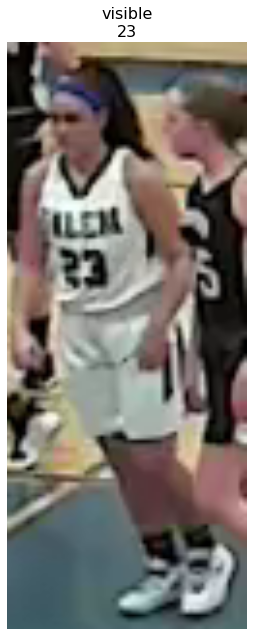

In [19]:
new_ds.view_row(0)

In [21]:
new_ds.create_quilt_dataset(
    user='hudlrd',
    package='basketball_jerseys2'
)

Launching a web browser...
If that didn't work, please visit the following URL: https://quilt-api.hudltools.com/login

Enter the code from the webpage: eyJjb2RlIjogIjYyZjMyZWRmLTdiN2UtNGNkYi05ZGRjLWRkNGEwZWQwZTg1OCIsICJpZCI6ICI3MTg4NDAwNi1mMDJiLTRlYTktYmI3My0zMGQyOGUwZGU1NWIifQ==
Fetching upload URLs from the registry...


  0%|          | 0.00/39.4k [00:00<?, ?B/s]

Uploading 3 fragments (39390 bytes)...


  1%|          | 478/39.4k [00:00<00:40, 955B/s]

Fragment 5e545212c1b045c5d4900b32c48ab5f20d758ece8756bce388079a84da90a875 already uploaded; skipping.
Fragment bc1eb10b56b4fc798464355266f7b9c2487ca79b40b849d1a4a0a308c197ace7 already uploaded; skipping.


100%|██████████| 39.4k/39.4k [00:01<00:00, 27.6kB/s]


Uploading package metadata...
Updating the 'latest' tag...
Push complete. hudlrd/basketball_jerseys2 is live:
https://quilt.hudltools.com/package/hudlrd/basketball_jerseys2
